#Laptop Price Prediction - Regression Project

## 1. Introduction & Problem Statement
### 2. Load Dataset
### 3. Basic EDA
### 4. Feature Understanding & Manual Feature Engineering Plan
### 5. Preprocessing (Encoding, Scaling)
### 6. Baseline Regression Models
### 7. Regularized Models (Ridge, Lasso, ElasticNet)
### 8. Feature Engineering (Polynomial, Interaction Terms)
### 9. Tree-Based Models (RandomForestRegressor)
### 10. Boosting Models (XGBRegressor, LightGBMRegressor)
### 11. Model Comparison (RMSE, MAE, R2)
### 12. Residual Analysis
### 13. SHAP Explainability (Tree-based model)
### 14. Conclusion & Business Interpretation
### 15. Limitations & Next Steps


#Project Summary -
In this project the goal was set to predict the **Final Selling Price of Laptops** based on their technical specifications.

This was done to simulate real marketplace pricing (Amazon/FLipkart/etc.) and to show how ML can capture relationships between hardware specs and market value.


In [36]:
import pandas as pd, numpy as np

df = pd.read_csv('/content/laptops.csv')

In [37]:
display(df.head(10),df.describe(), df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


None

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64


In [38]:
df['CPU'].unique()

array(['Intel Core i5', 'Intel Celeron', 'Intel Core i3', 'Intel Core i7',
       'AMD Ryzen 5', 'AMD Ryzen 7', 'AMD Ryzen 3', 'Apple M1',
       'AMD Athlon', 'Apple M2', 'AMD Ryzen 9', 'Intel Core i9',
       'AMD 3020e', 'Qualcomm Snapdragon 7', 'Intel Evo Core i7',
       'Intel Evo Core i5', 'Intel Pentium', 'Apple M2 Pro',
       'AMD Radeon 5', 'Intel Evo Core i9', 'AMD 3015e', 'Apple M1 Pro',
       'Intel Core M3', 'AMD Radeon 9', 'Mediatek MT8183', 'AMD 3015Ce',
       'Qualcomm Snapdragon 8', 'Microsoft SQ1'], dtype=object)

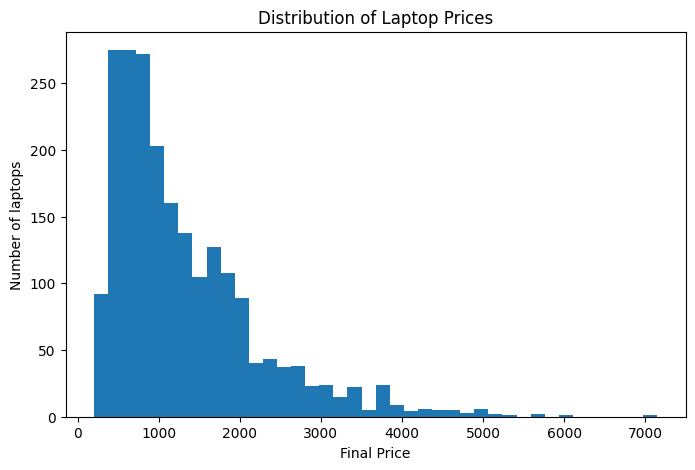

In [39]:
import matplotlib.pyplot as plt
#Spread of final laptop price

plt.figure(figsize=(8,5))
plt.hist(df['Final Price'], bins = 40)
plt.xlabel('Final Price')
plt.ylabel('Number of laptops')
plt.title('Distribution of Laptop Prices')
plt.show()

#1- Data Cleaning -
After doing basic EDA, some null values in 3 columns, one column that we can drop and a few numerical and categorical inconsistencies that we can optimize.

We dropped columns 'Laptop' and 'Model' as they wont be helpful in ML training.
We also handled nan fields in Storage Type column.



In [40]:
df = df.drop(columns='Laptop')
df = df.drop(columns='Model')


df.head(10)

,Status,Brand,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,New,Asus,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,New,Alurin,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,New,Asus,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,New,MSI,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,New,HP,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,New,MSI,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,New,Lenovo,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,New,Asus,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,New,Medion,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,New,HP,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


In [41]:
df['Storage type'] = df['Storage type'].fillna(df['Storage type'].mode()[0])
df['Storage type'].isna().sum()

np.int64(0)

###We made a function to replace missing GPU with inferred GPU brand where there were NA values.

In [42]:

import pandas as pd

def get_gpu_brand(gpu_string):
    # handling NaN explicitly
    if pd.isna(gpu_string):
        return "Unknown"

    s = str(gpu_string).lower()

    if('rtx' in s or
       'gtx' in s or
       s.startswith('mx') or 'mx' in s or
       s.startswith('t ') or 't' in s or
       s.startswith('p ') or 'p' in s):
      return 'Nvidia'

    if 'radeon' in s or s.startswith('rx') or ' rx' in s:
      return 'AMD'

    if 'iris' in s or 'uhd' in s or 'arc' in s or s.startswith('a '):
      return 'Intel'

    return 'Unknown'



df['gpu_brand'] = df['GPU'].apply(get_gpu_brand)

df['gpu_brand'].unique()



array(['Unknown', 'Nvidia', 'AMD', 'Intel'], dtype=object)

We dropped screen and 'GPU' column as we have a better 'GPU Brand' column for training which is more helpful.

We also converted 'Touch' column data into binary.

In [43]:
df = df.dropna(subset = ['Screen'])
df = df.drop(columns = ['GPU'])

df['Touch'] = df['Touch'].map({'Yes': 1, 'No': 0})

print(df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2156 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Status        2156 non-null   object 
 1   Brand         2156 non-null   object 
 2   CPU           2156 non-null   object 
 3   RAM           2156 non-null   int64  
 4   Storage       2156 non-null   int64  
 5   Storage type  2156 non-null   object 
 6   Screen        2156 non-null   float64
 7   Touch         2156 non-null   int64  
 8   Final Price   2156 non-null   float64
 9   gpu_brand     2156 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 185.3+ KB
None
Status          0
Brand           0
CPU             0
RAM             0
Storage         0
Storage type    0
Screen          0
Touch           0
Final Price     0
gpu_brand       0
dtype: int64


##We created a 3 filterd list  for CPU tiers and types where we took data from CPU column and seperated it into 'CPU_brand', 'CPU_Series' and 'CPU_tier' which makes this more ML friendly.

In [44]:
df['CPU'].head(20)
df['CPU'].unique()

def cpu_parse(cpu):
  s = str(cpu).lower()

  #Brand
  if 'intel' in s:
    brand = 'Intel'
  elif 'amd' in s:
    brand = 'AMD'
  elif 'apple' in s:
    brand = 'Apple'
  elif 'snapdragon' in s:
    brand = 'Qualcomm'
  elif 'mediatek' in s:
    brand = 'Mediatek'
  elif 'sq1' in s:
    brand = 'Microsoft'
  else:
    brand = 'Other'


  #tier

  if ('celeron' in s or 'pentium' in s or 'athlon' in s or
      '3020e' in s or '3015e' in s or '3015ce' in s or 'mt8183' in s):
    tier = 'Low'
  elif ('ryzen 9' in s or ' core i9' in s or 'i9' in s or
        'm1 pro' in s or 'm2 pro' in s):
    tier = 'Flagship'
  elif ('ryzen 7' in s or ' core i7' in s or 'i7' in s or
        'm2' in s or 'snapdragon 8' in s):
    tier = 'High'
  elif ('ryzen 5' in s or ' core i5' in s or 'i5' in s or
        'm1' in s or 'snapdragon 7' in s or 'core m3' in s or
        'sq1' in s):
    tier = 'Mid'
  elif ('ryzen 3' in s or ' core i3' in s or 'i3' in s):
    tier = 'Entry'
  else:
    tier = 'Mid'

  return brand, tier

df[['CPU_brand', 'CPU_tier']] = df['CPU'].apply(
    lambda x: pd.Series(cpu_parse(x))
)
df[['CPU', 'CPU_brand', 'CPU_tier']].head(20)


,CPU,CPU_brand,CPU_tier
0,Intel Core i5,Intel,Mid
1,Intel Celeron,Intel,Low
2,Intel Core i3,Intel,Entry
3,Intel Core i7,Intel,High
4,Intel Core i5,Intel,Mid
5,Intel Core i7,Intel,High
6,AMD Ryzen 5,AMD,Mid
7,Intel Core i7,Intel,High
8,Intel Core i5,Intel,Mid
9,Intel Core i7,Intel,High


<Figure size 800x500 with 0 Axes>

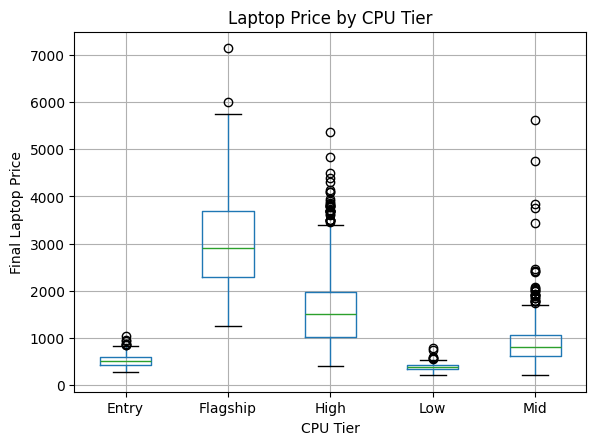

In [45]:
plt.figure(figsize=(8,5))
df.boxplot(column='Final Price', by='CPU_tier')
plt.title('Laptop Price by CPU Tier')
plt.suptitle('')
plt.xlabel('CPU Tier')
plt.ylabel('Final Laptop Price')
plt.show()


<Figure size 800x500 with 0 Axes>

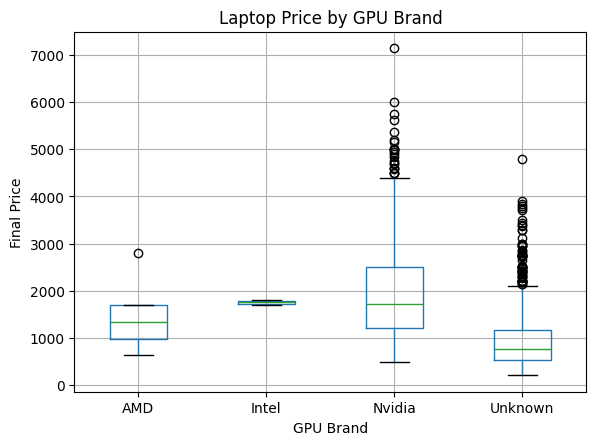

In [46]:
#laptop price by GPU brand

plt.figure(figsize=(8,5))
df.boxplot(column='Final Price', by='gpu_brand')
plt.title("Laptop Price by GPU Brand")
plt.suptitle("")
plt.xlabel("GPU Brand")
plt.ylabel("Final Price")
plt.show()


In [47]:
df[["Storage", "Storage type"]].head(20)
df["Storage"].unique()
df["Storage type"].unique()


array(['SSD', 'eMMC'], dtype=object)

###Converted Storage Type into binary as well because it only had 2 values.

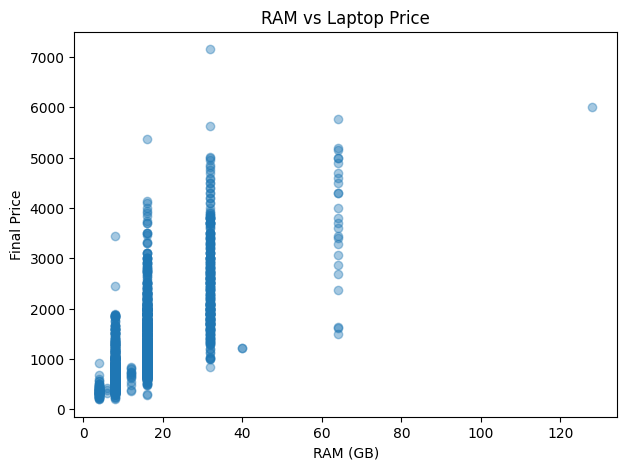

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(df['RAM'], df['Final Price'], alpha = 0.4)
plt.xlabel('RAM (GB)')
plt.ylabel('Final Price')
plt.title('RAM vs Laptop Price')
plt.show()



In [49]:
df['Storage type'].value_counts()

,count
Storage type,
SSD,2100
eMMC,56


In [50]:

df["Storage_High"] = (df["Storage"] >= 1000).astype(int)
df["Storage_High"].value_counts()

# To capture premium, high storage options

,count
Storage_High,
0,1542
1,614


###In RAM as we know, the storage size difference matters because the climb from 4 to 8 is significant but fades a bit fron 8 to 16 and from 16 to 32.

So we used a log feature that helped train the ML better also because regression model expects a linear relationship between features and this will make the usefulness curve so to speak into a linear one.

In [51]:
df['RAM_log'] = np.log1p(df['RAM'])
df['RAM_log'].head(20)




,RAM_log
0,2.197225
1,2.197225
2,2.197225
3,2.833213
4,2.833213
5,3.496508
6,2.197225
7,2.197225
8,2.197225
9,2.833213


In [52]:
df.info()   #sanity check of dtypes and nulls

<class 'pandas.core.frame.DataFrame'>
Index: 2156 entries, 0 to 2159
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Status        2156 non-null   object 
 1   Brand         2156 non-null   object 
 2   CPU           2156 non-null   object 
 3   RAM           2156 non-null   int64  
 4   Storage       2156 non-null   int64  
 5   Storage type  2156 non-null   object 
 6   Screen        2156 non-null   float64
 7   Touch         2156 non-null   int64  
 8   Final Price   2156 non-null   float64
 9   gpu_brand     2156 non-null   object 
 10  CPU_brand     2156 non-null   object 
 11  CPU_tier      2156 non-null   object 
 12  Storage_High  2156 non-null   int64  
 13  RAM_log       2156 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 252.7+ KB


###We made a variable that had all categorical columns (with alphabets/characters) and made dummy columns for them.
We then made another variable that had the copy of our processed dataset in addition to the newly made encoded categorical columns and a dropped column of 'CPU'.




In [53]:
# OHE of categorical columns

cat_cols = ['Status', 'Brand','Storage type', 'gpu_brand', 'CPU_brand', 'CPU_tier']

df_encoded = pd.get_dummies(df, columns= cat_cols, drop_first=True)

df_en = df_encoded.drop('CPU', axis =1)
df_en.head()
df_en.shape

(2156, 47)

##We benchmarked multipe models in regression model family to get a baseline numbers on how the dataset is performing and which model will get us the best result before and after parameter tuning



###Regression model - Baseline (to test the waters)

In [54]:
xx = df_en.drop('Final Price', axis = 1)
y = df_en['Final Price']

In [55]:
from sklearn.model_selection import train_test_split

xxtr, xxte, ytr, yte = train_test_split(xx, y, test_size=0.2, random_state=51)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(xxtr, ytr)

pred= lr.predict(xxte)

rmse = mean_squared_error(yte, pred) ** 0.5
r2 = r2_score(yte, pred)

print('RMSE:', rmse)
print('R2 Score:', r2)

RMSE: 455.53090955186985
R2 Score: 0.7350037583900793


Baseline of the initial Regression model are


RMSE: 455.53090955186985
R2 Score: 0.7350037583900793


##We'll start model tuning for benchmarking rn, to get an idea what will give us better results

We're gonna use
- Ridge(l2)
- Lasso (l1)


In [57]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 1.0)
ridge.fit(xxtr, ytr)

pred_r = ridge.predict(xxte)

rmse_r = (mean_squared_error(yte, pred_r)) ** 0.5
r2_r = r2_score(yte, pred_r)

print('Ridge RMSE:', rmse_r)
print('Ridge R2 Score:', r2_r)

lasso = Lasso(alpha= 0.0005)
lasso.fit(xxtr, ytr)

pred_l = lasso.predict(xxte)

rmse_l = (mean_squared_error(yte, pred_l)) **0.5
r2_l = r2_score(yte, pred_l)


print('Lasso RMSE:', rmse_l)
print('Lasso R2 Score:', r2_l)

Ridge RMSE: 453.6021447233561
Ridge R2 Score: 0.737243050442938
Lasso RMSE: 455.52821929971986
Lasso R2 Score: 0.735006888384504


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.495e+05, tolerance: 1.452e+05
  model = cd_fast.enet_coordinate_descent(


l1 and l2 benchemarked numbers -

Ridge RMSE: 453.6021
Ridge R2 Score: 0.73724
Lasso RMSE: 455.5282
Lasso R2 Score: 0.73500


this clearly shows that Ridge got better performance than lasso, we'll most probably use that going forward but we'll try elasticnet just to see any other possibility for improved results

In [58]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha= 0.01, l1_ratio=0.1)
enet.fit(xxtr, ytr)

pred_e = enet.predict(xxte)

rmse_e = (mean_squared_error(yte, pred_e))**0.5
r2_e = r2_score(yte, pred_e)

print('ElasticNet RMSE:', rmse_e)
print('ElasticNet Score:', r2_e)

ElasticNet RMSE: 458.66135947356514
ElasticNet Score: 0.7313490871324935


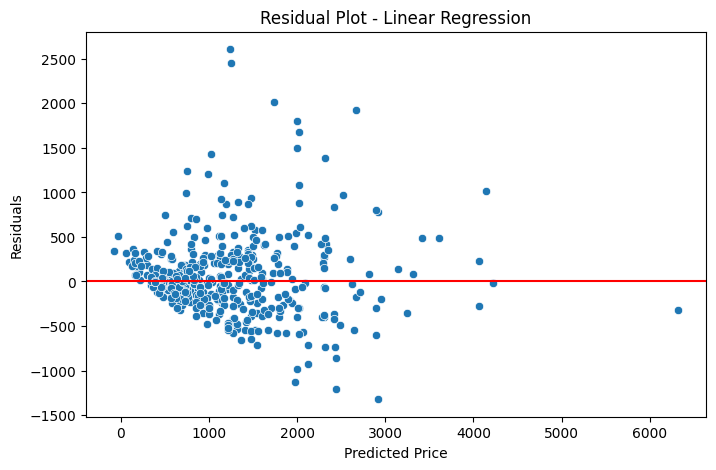

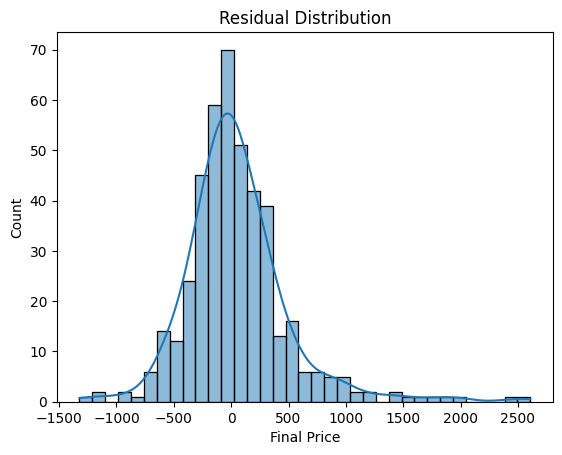

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = yte - pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

As we can see, its predicting lower priced models easily but is having trouble in predicting the higher priced model prices correctly.

More tuning will just waste time, performance upgrades (if any) will be negligible. We have a good baseline already so we should switch models now for better results.

##Trying out Random Forest Regressor

we'll follow the same process. Do a initial benchmark and then tune stuff from there.

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators = 300,
    max_depth = None,
    random_state = 51
)

rf.fit(xxtr, ytr)
pred_rf = rf.predict(xxte)

rmse_rf = (mean_squared_error(yte, pred_rf)) ** 0.5
r2_rf = r2_score(yte, pred_rf)

print("RF RMSE:", rmse_rf)
print("RF R2:", r2_rf)

RF RMSE: 422.79549308641225
RF R2: 0.771721657236135


Just the baseline seems better than the linear regression models.

As tree models are just better at getting non-linearity so we'll just use the most effective ones.

XGBoost regressor
LGBM regressor
Catboost regressor

In [26]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators = 600,
    learning_rate = 0.05,
    max_depth = 6,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 51
)

xgb.fit(xxtr, ytr)
pred_xgb = xgb.predict(xxte)

rmse_xgb = (mean_squared_error(yte, pred_xgb)) ** 0.5
r2_xgb = r2_score(yte, pred_xgb)

print("XGB RMSE:", rmse_xgb)
print("XGB R2:", r2_xgb)

XGB RMSE: 401.77949404636024
XGB R2: 0.7938517996782335


LGBM benchmarking

In [27]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators = 600,
    learning_rate = 0.05,
    max_depth = 1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 51
)

lgb.fit(xxtr, ytr)
pred_lgb= lgb.predict(xxte)

rmse_lgb = (mean_squared_error(yte, pred_lgb))**0.5
r2_lgb = r2_score(yte, pred_lgb)

print("LightGBM RMSE:", rmse_lgb)
print("LightGBM R2:", r2_lgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 1724, number of used features: 29
[LightGBM] [Info] Start training from score 1319.657048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

lgbm performed worse than xgboost. In simple words, lgbm didnt fail, it just likes native categorical data and/or less features, we have nither in this dataset.

We'll check catboost for the same.

In [28]:
!pip install catboost
from catboost import CatBoostRegressor

cat = CatBoostRegressor(
    iterations= 800,
    learning_rate =0.05,
    depth = 8,
    loss_function = 'RMSE',
    verbose = False,
    random_seed=51
)


cat.fit(xxtr, ytr)
pred_cat= cat.predict(xxte)

rmse_cat = (mean_squared_error(yte, pred_cat)) ** 0.5
r2_cat = r2_score(yte, pred_cat)

print('RMSE CatBoost:', rmse_cat)
print('R2 CatBoost:', r2_cat)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
RMSE CatBoost: 412.17431174391027
R2 CatBoost: 0.7830469022615341


Catboost seems to be a bit worse than xgb, so we'll tune xgb for even better results and a production ready model

We'll run a sample of tunes and see which one will work the best, and later choose that for the main model.

In [29]:
etas = [0.05, 0.03, 0.01]
depths = [4,6,8]
subsamples = [0.7, 0.8, 1.0]
colsamples = [0.7, 0.8, 1.0]

results = []

for eta in etas:
  for depth in depths:
    for sub in subsamples:
      for col in colsamples:

        model = XGBRegressor(
            n_estimators = 600,
            learning_rate = eta,
            max_depth = depth,
            subsample = sub,
            colsample_bytree=col,
            random_state=51
        )

        model.fit(xxtr, ytr)
        pred = model.predict(xxte)

        rmse = (mean_squared_error(yte, pred)) ** 0.5
        r2 = r2_score(yte, pred)

        results.append({
            'eta':eta,
            'depth':depth,
            'sub':sub,
            'col':col,
            'rmse':rmse,
            'r2':r2
        })


df_tune = pd.DataFrame(results)
df_tune = df_tune.sort_values('rmse')
df_tune.head(10)



,eta,depth,sub,col,rmse,r2
40,0.03,6,0.8,0.8,400.687580,0.794971
52,0.03,8,1.0,0.8,401.256311,0.794388
41,0.03,6,0.8,1.0,401.701002,0.793932
12,0.05,6,0.8,0.7,401.702782,0.793931
13,0.05,6,0.8,0.8,401.779494,0.793852
51,0.03,8,1.0,0.7,401.790948,0.793840
39,0.03,6,0.8,0.7,402.139562,0.793482
78,0.01,8,1.0,0.7,402.677549,0.792929
24,0.05,8,1.0,0.7,402.677872,0.792929
10,0.05,6,0.7,0.8,402.737354,0.792868


At last we did a SHAP (SHapely Additive exPlanation) to understand and give a simple visual explaination of why the model predicted a certain price.

We took the best perfoming XGBoost regressor and then ran it through SHAP explainer to get a visual aid for the predictions.

In [30]:
best_xgb = XGBRegressor(
            n_estimators = 600,
            learning_rate = 0.03,
            max_depth = 6,
            subsample = 0.8,
            colsample_bytree=0.8,
            random_state=51
        )

best_xgb.fit(xxtr, ytr)
pred_best = best_xgb.predict(xxte)

rmse_best = (mean_squared_error(yte, pred_best)) ** 0.5
r2_best = r2_score(yte, pred_best)

print("BEST RMSE:", rmse_best)
print("BEST R2:", r2_best)



BEST RMSE: 400.6875797169237
BEST R2: 0.7949707731739871


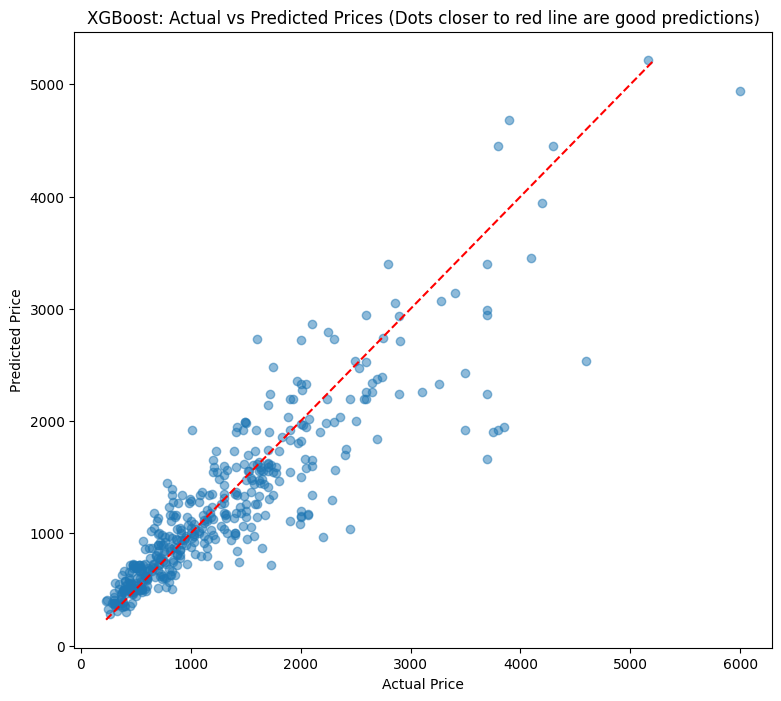

In [31]:
#predicted vs actual scatter plot

plt.figure(figsize=(9,8))
plt.scatter(yte, pred_best, alpha = 0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Actual vs Predicted Prices (Dots closer to red line are good predictions)')

min_v=min(yte.min(), pred_best.min())
max_v=min(yte.max(), pred_best.max())
plt.plot([min_v, max_v], [min_v, max_v], 'r--')
plt.show()


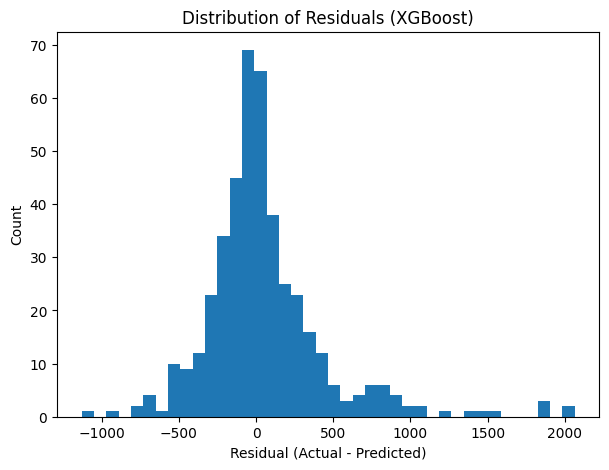

In [32]:
residuals = yte - pred_best

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=40)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.title("Distribution of Residuals (XGBoost)")
plt.show()


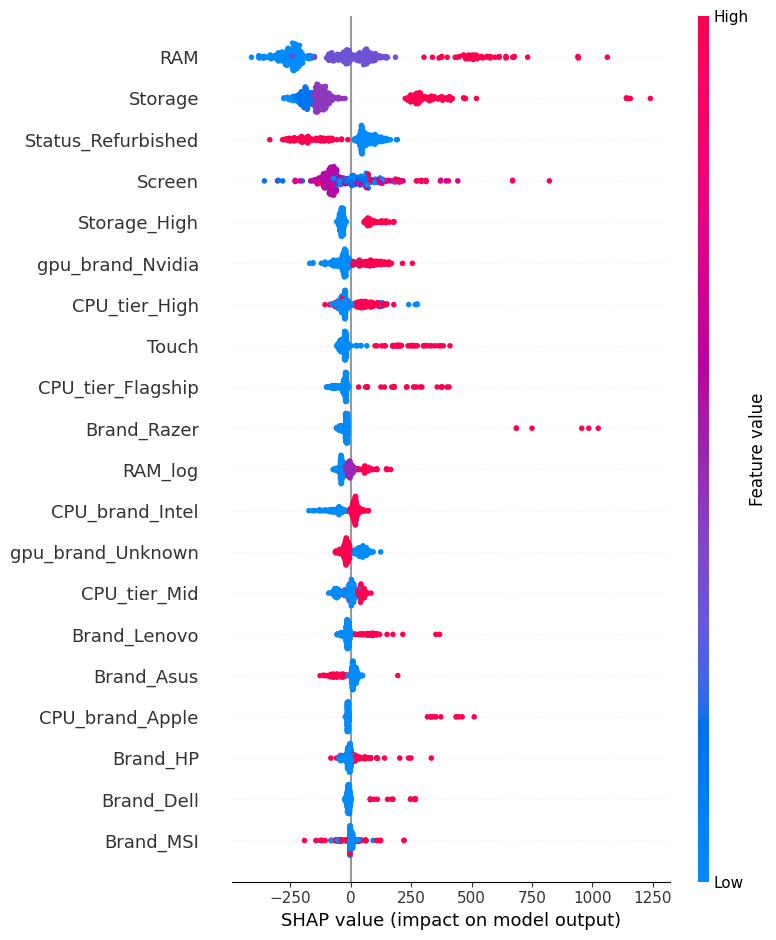

'\n#for single prediction graph\nidx = 0\nshap.force_plot(explainer.expected_values, shap_values[idx], xxte.iloc[idx])\n'

In [33]:
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(xxte)

shap.summary_plot(shap_values, xxte, feature_names = xxte.columns)

'''
#for single prediction graph
idx = 0
shap.force_plot(explainer.expected_values, shap_values[idx], xxte.iloc[idx])
'''


Above is the summary/beeswarm plot for SHAP (Global SHAP - for all predicted values).

Each dot = one laptop;
- Red dots = High value, price pushed up because of this.
- Blue dot = Low value, lowers the price
- Horizontal Position = Impact on price; right = price pushed up; left = price pushed down.

In simple terms, if we take RAM as an example, Red dots on the right → High RAM consistently raises the price

Blue dots on the left → Low RAM lowers price

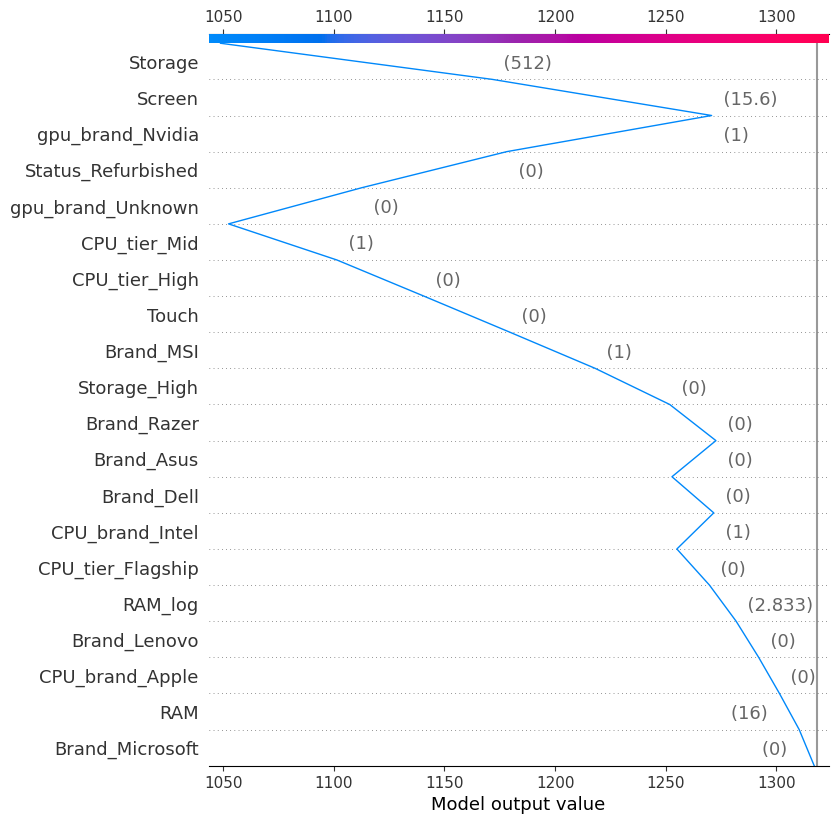

In [34]:
i = 0

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
shap.decision_plot(
    explainer.expected_value,
    shap_values[i],
    xxte.iloc[i])

Above is the Decision plot, for a single laptop (Local SHAP). It shows how the model arrived at the predicted price for one laptop.

It starts at the baseline price of the laptop, from there, if it steps to the right, that means that feature pushed the price up in general and vice versa if it steps to the left.

NOTE: the '0' and '1' are the values that pushed the decision of the ML model.

For example, a specific laptop might show:

+350 from CPU Tier = High

+220 from Nvidia GPU

+140 from 16GB RAM

–90 for being Refurbished

–60 for smaller display

This gives a transparent, human-readable justification of the price, the same way an Apple's/BestBuy's pricing team would explain it.


#Insights

| Insight                        | Explanation                                         |
| ------------------------------ | --------------------------------------------------- |
| RAM is the strongest driver    | More RAM strongly increases price across all models |
| Storage size matters a lot     | 512GB+ creates a noticeable price jump              |
| Nvidia GPUs boost price        | Gaming & creator laptops priced higher              |
| High-tier CPU = high price     | i7/i9, Ryzen 7/9 models push premium pricing        |
| Refurbished cuts price         | Consistent downward SHAP impact                     |
| Brand impacts but is secondary | Specs influence price more than brand name          |
| Screen size influences         | Larger screens predict higher prices                |


# Summary -

This project demonstrates:

- End-to-end ML workflow

- Real-world feature engineering

- Model tuning

- Full interpretability

To make this production-ready, the following steps can be added:

- Save preprocessing pipeline

- Save trained model (.json or .pkl)

- Save schema (column order)

- Create a prediction function

- Deploy via API (FastAPI/Flask) or Streamlit UI

This converts the notebook into a deployable pricing engine.

### Exporting the model

In [35]:
import joblib, json

!mkdir -p models

joblib.dump(best_xgb, 'xgb_laptop_price.pkl')


['xgb_laptop_price.pkl']

# Exporting data for Power BI

In [72]:
# for price prediction
pred_price = best_xgb.predict(xxte)

#making export table
df_human = df.copy()

pb = df_human.loc[xxte.index].copy()


pb["Actual_Price"] = yte.values
pb["Predicted_Price"] = pred_best
pb["Residual"] = pb["Actual_Price"] - pb["Predicted_Price"]
pb["Abs_Error"] = np.abs(pb["Residual"])

pb.to_csv("laptop_scoring_powerbi.csv", index=False)


In [75]:
pb.head(20)

,Status,Brand,CPU,RAM,Storage,Storage type,Screen,Touch,Final Price,gpu_brand,CPU_brand,CPU_tier,Storage_High,RAM_log,Actual_Price,Predicted_Price,Residual,Abs_Error
164,New,MSI,Intel Core i5,16,512,SSD,15.6,0,999.00,Nvidia,Intel,Mid,0,2.833213,999.00,1048.820435,-49.820435,49.820435
788,New,Acer,Intel Core i7,32,1000,SSD,16.0,0,2739.00,Nvidia,Intel,High,1,3.496508,2739.00,2393.858398,345.141602,345.141602
404,New,MSI,Intel Evo Core i7,16,1000,SSD,13.3,0,1499.01,Unknown,Intel,High,1,2.833213,1499.01,1202.803467,296.206533,296.206533
939,New,Lenovo,Intel Core i3,8,512,SSD,15.6,0,773.60,Unknown,Intel,Entry,0,2.197225,773.60,518.394897,255.205103,255.205103
63,New,MSI,Intel Core i5,16,512,SSD,15.6,0,1099.00,Nvidia,Intel,Mid,0,2.833213,1099.00,1048.820435,50.179565,50.179565
1153,Refurbished,MSI,Intel Core i7,16,512,SSD,14.0,0,1399.00,Nvidia,Intel,High,0,2.833213,1399.00,980.669006,418.330994,418.330994
1644,New,Microsoft,Intel Core i7,16,512,SSD,12.3,0,2099.00,Unknown,Intel,High,0,2.833213,2099.00,1601.472168,497.527832,497.527832
768,New,Dell,Intel Core i5,8,512,SSD,14.0,0,743.00,Unknown,Intel,Mid,0,2.197225,743.00,984.039673,-241.039673,241.039673
1425,New,HP,Intel Core i3,8,256,SSD,14.0,0,581.07,Unknown,Intel,Entry,0,2.197225,581.07,616.324524,-35.254524,35.254524
312,New,HP,AMD Ryzen 7,16,1000,SSD,16.1,0,1699.01,Nvidia,AMD,High,1,2.833213,1699.01,1551.898682,147.111318,147.111318


In [70]:
xxte.columns

Index(['RAM', 'Storage', 'Screen', 'Touch', 'Storage_High', 'RAM_log',
       'Status_Refurbished', 'Brand_Alurin', 'Brand_Apple', 'Brand_Asus',
       'Brand_Deep Gaming', 'Brand_Dell', 'Brand_Denver',
       'Brand_Dynabook Toshiba', 'Brand_Gigabyte', 'Brand_HP', 'Brand_Innjoo',
       'Brand_Jetwing', 'Brand_LG', 'Brand_Lenovo', 'Brand_MSI',
       'Brand_Medion', 'Brand_Microsoft', 'Brand_Millenium', 'Brand_PcCom',
       'Brand_Primux', 'Brand_Prixton', 'Brand_Razer', 'Brand_Realme',
       'Brand_Samsung', 'Brand_Thomson', 'Brand_Toshiba', 'Brand_Vant',
       'Storage type_eMMC', 'gpu_brand_Intel', 'gpu_brand_Nvidia',
       'gpu_brand_Unknown', 'CPU_brand_Apple', 'CPU_brand_Intel',
       'CPU_brand_Mediatek', 'CPU_brand_Microsoft', 'CPU_brand_Qualcomm',
       'CPU_tier_Flagship', 'CPU_tier_High', 'CPU_tier_Low', 'CPU_tier_Mid'],
      dtype='object')